###Introduction


This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the <a href="https://pandas.pydata.org/docs/user_guide/cookbook.html#cookbook" target="_blank">Cookbook<a/>.

Customarily, we import as follows:

In [1]:
import numpy as np
import pandas as pd

## Object Creation


See the <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/dsintro.html#dsintro">Intro to data structures section</a>.

Creating a <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series">`Series`</a> by passing a list of values, letting pandas create a default integer index:

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> by passing a NumPy array, with a datetime index using <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.date_range.html#pandas.date_range">`date_range()`</a> and labeled columns:

In [3]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,0.166291,-0.873153,0.073128,0.548312
2013-01-02,1.000437,0.635331,-0.926532,0.799383
2013-01-03,-1.557861,1.061715,-0.928415,1.661738
2013-01-04,0.830073,-1.643312,1.001364,-1.018485
2013-01-05,0.399211,0.009242,-0.165686,1.572259
2013-01-06,-0.965686,-0.283647,-0.399541,0.495716


Creating a <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> by passing a dictionary of objects that can be converted into a series-like structure:

In [5]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> have different <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/basics.html#basics-dtypes">`dtypes`</a>:

In [6]:
df2.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object

If you’re using an interactive tool with automatic completion for column names, here’s a subset of the attributes that will be completed:
```
df2.<TAB>
df2.A                  df2.bool
df2.abs                df2.boxplot
df2.add                df2.C
df2.add_prefix         df2.clip
df2.add_suffix         df2.columns
df2.align              df2.copy
df2.all                df2.count
df2.any                df2.combine
df2.append             df2.D
df2.apply              df2.describe
df2.applymap           df2.diff
df2.B                  df2.duplicated
```
As you can see, the columns `A`, `B`, `C`, and `D` are automatically tab completed. `E` and `F` are there as well; the rest of the attributes have been truncated for brevity.



## Viewing data

See the <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/basics.html#basics">Basics section</a>.

Use <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html#pandas.DataFrame.head">`DataFrame.head()`</a> and <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html#pandas.DataFrame.tail">`DataFrame.tail()`</a> to view the top and bottom rows of the frame respectively:

In [7]:
df.head()

,A,B,C,D
2013-01-01,0.166291,-0.873153,0.073128,0.548312
2013-01-02,1.000437,0.635331,-0.926532,0.799383
2013-01-03,-1.557861,1.061715,-0.928415,1.661738
2013-01-04,0.830073,-1.643312,1.001364,-1.018485
2013-01-05,0.399211,0.009242,-0.165686,1.572259


In [8]:
df.tail(3)

,A,B,C,D
2013-01-04,0.830073,-1.643312,1.001364,-1.018485
2013-01-05,0.399211,0.009242,-0.165686,1.572259
2013-01-06,-0.965686,-0.283647,-0.399541,0.495716


Display the <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.index.html#pandas.DataFrame.index">`DataFrame.index`</a> or <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html#pandas.DataFrame.columns">`DataFrame.columns`</a>:

In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

<a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a> gives a NumPy representation of the underlying data. Note that this can be an expensive operation when your <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: **NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column**. When you call <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a>, pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being `object`, which requires casting every value to a Python object.

For `df`, our <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> of all floating-point values, and <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a> is fast and doesn’t require copying data:

In [11]:
df.to_numpy()

array([[ 0.16629053, -0.87315321,  0.0731277 ,  0.5483124 ],
       [ 1.00043662,  0.63533144, -0.92653243,  0.79938309],
       [-1.55786083,  1.06171503, -0.92841513,  1.66173829],
       [ 0.83007336, -1.64331236,  1.00136355, -1.01848527],
       [ 0.39921139,  0.00924175, -0.16568589,  1.57225875],
       [-0.96568566, -0.28364656, -0.39954106,  0.49571585]])

For `df2`, the <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame">`DataFrame`</a> with multiple dtypes, <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a> is relatively expensive:



In [12]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

NOTE: <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy">`DataFrame.to_numpy()`</a> does not include the index or column labels in the output.

<a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe">`describe()`</a> shows a quick statistic summary of your data:

In [13]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.021256,-0.182304,-0.224281,0.676487
std,1.023102,0.987410,0.723017,0.970595
min,-1.557861,-1.643312,-0.928415,-1.018485
25%,-0.682692,-0.725777,-0.794785,0.508865
50%,0.282751,-0.137202,-0.282613,0.673848
75%,0.722358,0.478809,0.013424,1.379040
max,1.000437,1.061715,1.001364,1.661738


Transposing your data:

In [14]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.166291,1.000437,-1.557861,0.830073,0.399211,-0.965686
B,-0.873153,0.635331,1.061715,-1.643312,0.009242,-0.283647
C,0.073128,-0.926532,-0.928415,1.001364,-0.165686,-0.399541
D,0.548312,0.799383,1.661738,-1.018485,1.572259,0.495716


<a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_index.html#pandas.DataFrame.sort_index">`DataFrame.sort_index()`</a> sorts by an axis:

In [15]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.548312,0.073128,-0.873153,0.166291
2013-01-02,0.799383,-0.926532,0.635331,1.000437
2013-01-03,1.661738,-0.928415,1.061715,-1.557861
2013-01-04,-1.018485,1.001364,-1.643312,0.830073
2013-01-05,1.572259,-0.165686,0.009242,0.399211
2013-01-06,0.495716,-0.399541,-0.283647,-0.965686


<a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values">`DataFrame.sort_values()`</a> sorts by values:

In [16]:
df.sort_values(by='B')

,A,B,C,D
2013-01-04,0.830073,-1.643312,1.001364,-1.018485
2013-01-01,0.166291,-0.873153,0.073128,0.548312
2013-01-06,-0.965686,-0.283647,-0.399541,0.495716
2013-01-05,0.399211,0.009242,-0.165686,1.572259
2013-01-02,1.000437,0.635331,-0.926532,0.799383
2013-01-03,-1.557861,1.061715,-0.928415,1.661738


## Selection

NOTE: While standard Python / NumPy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at">`DataFrame.at()`</a>, <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iat.html#pandas.DataFrame.iat">`DataFrame.iat()`</a>, <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc">`DataFrame.loc()`</a> and <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc">`DataFrame.iloc()`</a>.

See the indexing documentation <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/indexing.html#indexing">Indexing and Selecting Data</a> and <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/advanced.html#advanced">MultiIndex / Advanced Indexing</a>.



### Getting

Selecting a single column, which yields a <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series">`Series`</a>, equivalent to `df.A`:

In [17]:
df["A"]

2013-01-01    0.166291
2013-01-02    1.000437
2013-01-03   -1.557861
2013-01-04    0.830073
2013-01-05    0.399211
2013-01-06   -0.965686
Freq: D, Name: A, dtype: float64

Selecting via `[]` (`__getitem__`), which slices the rows:

In [18]:
df[0:3]

,A,B,C,D
2013-01-01,0.166291,-0.873153,0.073128,0.548312
2013-01-02,1.000437,0.635331,-0.926532,0.799383
2013-01-03,-1.557861,1.061715,-0.928415,1.661738


In [19]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,1.000437,0.635331,-0.926532,0.799383
2013-01-03,-1.557861,1.061715,-0.928415,1.661738
2013-01-04,0.830073,-1.643312,1.001364,-1.018485


### Selection by label

See more in <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-label">Selection by Label</a> using <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc">`DataFrame.loc()`</a> or <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at">`DataFrame.at()`</a>.

For getting a cross section using a label:

In [20]:
df.loc[dates[0]]

A    0.166291
B   -0.873153
C    0.073128
D    0.548312
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label:

In [21]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,0.166291,-0.873153
2013-01-02,1.000437,0.635331
2013-01-03,-1.557861,1.061715
2013-01-04,0.830073,-1.643312
2013-01-05,0.399211,0.009242
2013-01-06,-0.965686,-0.283647


Showing label slicing, both endpoints are included:

In [22]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,1.000437,0.635331
2013-01-03,-1.557861,1.061715
2013-01-04,0.830073,-1.643312


Reduction in the dimensions of the returned object:

In [23]:
df.loc["20130102", ["A", "B"]]

A    1.000437
B    0.635331
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value:

In [24]:
df.loc[dates[0], "A"]

np.float64(0.16629052954687376)

For getting fast access to a scalar (equivalent to the prior method):

In [25]:
df.at[dates[0], "A"]

np.float64(0.16629052954687376)

### Selection by position

See more in <a target="_blank" href="https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-integer">Selection by Position</a> using <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc">`DataFrame.iloc()`</a> or <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at">`DataFrame.at()`</a>.

Select via the position of the passed integers:

In [26]:
df.iloc[3]

A    0.830073
B   -1.643312
C    1.001364
D   -1.018485
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to NumPy/Python:

In [27]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.830073,-1.643312
2013-01-05,0.399211,0.009242


By lists of integer position locations, similar to the NumPy/Python style:

In [28]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,1.000437,-0.926532
2013-01-03,-1.557861,-0.928415
2013-01-05,0.399211,-0.165686


For slicing rows explicitly:

In [29]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,1.000437,0.635331,-0.926532,0.799383
2013-01-03,-1.557861,1.061715,-0.928415,1.661738


For slicing columns explicitly:

In [30]:
df.iloc[:, 1:3]

,B,C
2013-01-01,-0.873153,0.073128
2013-01-02,0.635331,-0.926532
2013-01-03,1.061715,-0.928415
2013-01-04,-1.643312,1.001364
2013-01-05,0.009242,-0.165686
2013-01-06,-0.283647,-0.399541


For getting a value explicitly:

In [31]:
df.iloc[1, 1]

np.float64(0.6353314391081716)

For getting fast access to a scalar (equivalent to the prior method):

In [32]:
df.iat[1, 1]

np.float64(0.6353314391081716)

### Boolean indexing

Using a single column’s values to select data:

In [33]:
df[df["A"] > 0]

,A,B,C,D
2013-01-01,0.166291,-0.873153,0.073128,0.548312
2013-01-02,1.000437,0.635331,-0.926532,0.799383
2013-01-04,0.830073,-1.643312,1.001364,-1.018485
2013-01-05,0.399211,0.009242,-0.165686,1.572259


Selecting values from a DataFrame where a boolean condition is met:

In [34]:
df[df > 0]

,A,B,C,D
2013-01-01,0.166291,NaN,0.073128,0.548312
2013-01-02,1.000437,0.635331,NaN,0.799383
2013-01-03,NaN,1.061715,NaN,1.661738
2013-01-04,0.830073,NaN,1.001364,NaN
2013-01-05,0.399211,0.009242,NaN,1.572259
2013-01-06,NaN,NaN,NaN,0.495716


Using the <a target="_blank" href="https://pandas.pydata.org/docs/reference/api/pandas.Series.isin.html#pandas.Series.isin">`isin()`</a> method for filtering:

In [35]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2013-01-01,0.166291,-0.873153,0.073128,0.548312,one
2013-01-02,1.000437,0.635331,-0.926532,0.799383,one
2013-01-03,-1.557861,1.061715,-0.928415,1.661738,two
2013-01-04,0.830073,-1.643312,1.001364,-1.018485,three
2013-01-05,0.399211,0.009242,-0.165686,1.572259,four
2013-01-06,-0.965686,-0.283647,-0.399541,0.495716,three


In [36]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,-1.557861,1.061715,-0.928415,1.661738,two
2013-01-05,0.399211,0.009242,-0.165686,1.572259,four


### Setting

Setting a new column automatically aligns the data by the indexes:

In [37]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [38]:
df["F"] = s1

Setting values by label:

In [39]:
df.at[dates[0], "A"] = 0

Setting values by position:

In [40]:
df.iat[0, 1] = 0

Setting by assigning with a NumPy array:

In [41]:
df.loc[:, "D"] = np.array([5] * len(df))

The result of the prior setting operations:

In [42]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.073128,5.0,NaN
2013-01-02,1.000437,0.635331,-0.926532,5.0,1.0
2013-01-03,-1.557861,1.061715,-0.928415,5.0,2.0
2013-01-04,0.830073,-1.643312,1.001364,5.0,3.0
2013-01-05,0.399211,0.009242,-0.165686,5.0,4.0
2013-01-06,-0.965686,-0.283647,-0.399541,5.0,5.0


A `where` operation with setting:

In [43]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.073128,-5.0,NaN
2013-01-02,-1.000437,-0.635331,-0.926532,-5.0,-1.0
2013-01-03,-1.557861,-1.061715,-0.928415,-5.0,-2.0
2013-01-04,-0.830073,-1.643312,-1.001364,-5.0,-3.0
2013-01-05,-0.399211,-0.009242,-0.165686,-5.0,-4.0
2013-01-06,-0.965686,-0.283647,-0.399541,-5.0,-5.0


## Missing data

pandas primarily uses the `np.nan` to represent missing data. It is by default not included in computations. See the [Missing Data](https://pandas.pydata.org/docs/user_guide/missing_data.html#missing-data) section.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data:

In [44]:
df1 = df.reindex(index = dates[0:4], columns = list(df.columns) + ['E'])
df1.loc[dates[0] : dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.073128,5.0,NaN,1.0
2013-01-02,1.000437,0.635331,-0.926532,5.0,1.0,1.0
2013-01-03,-1.557861,1.061715,-0.928415,5.0,2.0,NaN
2013-01-04,0.830073,-1.643312,1.001364,5.0,3.0,NaN


[`DataFrame.dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna) drops any rows that have missing data:



In [45]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,1.000437,0.635331,-0.926532,5.0,1.0,1.0


[`DataFrame.fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna) fills missing data:

In [46]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.073128,5.0,5.0,1.0
2013-01-02,1.000437,0.635331,-0.926532,5.0,1.0,1.0
2013-01-03,-1.557861,1.061715,-0.928415,5.0,2.0,5.0
2013-01-04,0.830073,-1.643312,1.001364,5.0,3.0,5.0


[`isna()`](https://pandas.pydata.org/docs/reference/api/pandas.isna.html#pandas.isna) gets the boolean mask where values are `nan`:

In [47]:
pd.isna(df)

,A,B,C,D,F
2013-01-01,False,False,False,False,True
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,False
2013-01-04,False,False,False,False,False
2013-01-05,False,False,False,False,False
2013-01-06,False,False,False,False,False


## Operations

See the [Basic section on Binary Ops](https://pandas.pydata.org/docs/user_guide/basics.html#basics-binop).

### Stats

Operations in general *exclude* missing data.

Performing a descriptive statistic:


In [48]:
df.mean()

A   -0.048971
B   -0.036778
C   -0.224281
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis:

In [49]:
df.mean(1)

2013-01-01    1.268282
2013-01-02    1.341847
2013-01-03    1.115088
2013-01-04    1.637625
2013-01-05    1.848553
2013-01-06    1.670225
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically
broadcasts along the specified dimension

In [50]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index = dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [51]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-2.557861,0.061715,-1.928415,4.0,1.0
2013-01-04,-2.169927,-4.643312,-1.998636,2.0,0.0
2013-01-05,-4.600789,-4.990758,-5.165686,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

[`DataFrame.apply()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html#pandas.DataFrame.apply) applies a user defined function to the data:

In [52]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.073128,5.0,NaN
2013-01-02,1.000437,0.635331,-0.853405,10.0,1.0
2013-01-03,-0.557424,1.697046,-1.781820,15.0,3.0
2013-01-04,0.272649,0.053734,-0.780456,20.0,6.0
2013-01-05,0.671861,0.062976,-0.946142,25.0,10.0
2013-01-06,-0.293825,-0.220671,-1.345683,30.0,15.0


In [53]:
df.apply(lambda x: x.max() - x.min())

A    2.558297
B    2.705027
C    1.929779
D    0.000000
F    4.000000
dtype: float64

### Histogramming

See more at [Histogramming and Discretization](https://pandas.pydata.org/docs/user_guide/basics.html#basics-discretization).

In [54]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    5
1    3
2    2
3    4
4    0
5    2
6    2
7    6
8    3
9    6
dtype: int64

In [55]:
s.value_counts()

2    3
3    2
6    2
5    1
4    1
0    1
Name: count, dtype: int64

### String Methods

Series is equipped with a set of string processing methods in the `str` attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in `str` generally uses [regular expressions](https://docs.python.org/3/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](https://pandas.pydata.org/docs/user_guide/text.html#text-string-methods).

In [56]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

pandas provides various facilities for easily combining together Series and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](https://pandas.pydata.org/docs/user_guide/merging.html#merging).

Concatenating pandas objects together along an axis with [`concat()`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html#pandas.concat):

In [57]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.194882,0.036023,-0.816091,0.559994
1,-0.736934,-0.545425,2.405356,-0.362803
2,0.275223,1.107142,-1.255880,0.125215
3,-0.651360,-0.186943,0.673977,0.751409
4,0.445756,0.615484,-1.687090,1.572593
5,-0.887856,0.090347,-1.905071,1.364111
6,-1.838663,-0.435922,-0.424571,0.103361
7,-1.242873,1.842650,1.643419,0.823996
8,-0.205773,-0.018710,0.579202,-0.369223
9,-0.535396,-0.765954,-0.855794,2.003047


In [58]:
# break it onto pieces
pieces = [df[:3], df[3:7], df[7:]]

pd.concat(pieces)

,0,1,2,3
0,0.194882,0.036023,-0.816091,0.559994
1,-0.736934,-0.545425,2.405356,-0.362803
2,0.275223,1.107142,-1.255880,0.125215
3,-0.651360,-0.186943,0.673977,0.751409
4,0.445756,0.615484,-1.687090,1.572593
5,-0.887856,0.090347,-1.905071,1.364111
6,-1.838663,-0.435922,-0.424571,0.103361
7,-1.242873,1.842650,1.643419,0.823996
8,-0.205773,-0.018710,0.579202,-0.369223
9,-0.535396,-0.765954,-0.855794,2.003047


NOTE: Adding a column to a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) is relatively fast. However, adding a row requires a copy, and may be expensive. We recommend passing a pre-built list of records to the [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) constructor instead of building a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) by iteratively appending records to it.

### Join

[`merge()`](https://pandas.pydata.org/docs/reference/api/pandas.merge.html#pandas.merge) enables SQL style join types along specific columns. See the [Database style joining](https://pandas.pydata.org/docs/user_guide/merging.html#merging-join) section.

In [59]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
print(left)
print(right)
pd.merge(left, right, on="key")

   key  lval
0  foo     1
1  foo     2
   key  rval
0  foo     4
1  foo     5


,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Adding a column to a `DataFrame` is relatively fast. However adding a row requires a copy, and may be expensive. It is recorecommended passing a pre-build list of records to the `DataFrame` constructor instead of buildinga `DataFrame` by iteratively appending records to it.

Another example that can be given is:

In [60]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
print(left)
print(right)
pd.merge(left, right, on="key")

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By 'group by' we are referring to a process invloving one or more of the following steps:


*   **Splitting** the data into group base on some criteria
*   **Applying** a function to each group independently

*   **Combining** the results into a data structure

See the [Grouping section](https://pandas.pydata.org/docs/user_guide/groupby.html#groupby).


In [61]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'bar'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.778552,-0.831259
1,bar,one,-0.841099,0.656670
2,foo,two,-0.606342,0.592694
3,bar,three,-0.652346,-0.520552
4,foo,two,-0.390132,-0.360435
5,bar,two,0.193097,-1.067376
6,foo,one,0.431287,2.308659
7,bar,three,-0.758678,-1.685183


Grouping and then applying the `sum()` funcion to the resulting group:

In [62]:
df.groupby('A')[["C", "D"]].sum()

,C,D
A,,
bar,-2.059025,-2.616440
foo,-1.343740,1.709658


Grouping by multiple columns forms a hierarchical index, and again we can apply the `sum()` function:

In [91]:
df.groupby(["A", "B"]).sum()

,,C,D
A,B,,
-26.232303,23.647199,-6.329030,-46.772017
-25.952213,23.619409,-7.036722,-44.882470
-25.739309,22.388254,-8.623860,-45.692789
-25.689666,22.286194,-7.465608,-46.638830
-25.622680,23.329069,-7.483797,-46.328423
...,...,...,...
21.968219,-8.285602,-23.398604,-56.598126
22.346475,-3.783903,-24.740152,-52.856898
22.871510,-7.533738,-25.642477,-55.565709


## Reshaping

See the sections on [Hierarchical Indexing](https://pandas.pydata.org/docs/user_guide/advanced.html#advanced-hierarchical) and [Reshaping](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-stacking).

### Stack

In [64]:
tuples = list(
    zip(
        ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
        ["one", "two", "one", "two", "one", "two", "one", "two"],
    )
)

index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.166800 -0.321870
      two    -0.788425  0.032161
baz   one    -0.613190  0.015849
      two    -1.207783 -0.978435

The [`stack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack) method “compresses” a level in the DataFrame’s columns:



In [65]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.166800
               B   -0.321870
       two     A   -0.788425
               B    0.032161
baz    one     A   -0.613190
               B    0.015849
       two     A   -1.207783
               B   -0.978435
dtype: float64

With a “stacked” DataFrame or Series (having a [MultiIndex](https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.html#pandas.MultiIndex) as the `index`), the inverse operation of [`stack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack) is [`unstack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack), which by default unstacks the **last level**:

In [66]:
stacked.unstack()

A         B
first second                    
bar   one    -0.166800 -0.321870
      two    -0.788425  0.032161
baz   one    -0.613190  0.015849
      two    -1.207783 -0.978435

In [67]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.166800 -0.788425
      B -0.321870  0.032161
baz   A -0.613190 -1.207783
      B  0.015849 -0.978435

In [68]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.166800 -0.613190
       B -0.321870  0.015849
two    A -0.788425 -1.207783
       B  0.032161 -0.978435

### Pivot tables

See the section on [Pivot Tables](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-pivot).

In [69]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,-1.265737,0.277986
1,one,B,foo,-0.614362,1.501706
2,two,C,foo,0.462793,-0.825989
3,three,A,bar,0.655247,0.665730
4,one,B,bar,0.191436,-0.671390
5,one,C,bar,-0.831059,0.123839
6,two,A,foo,0.346159,0.047478
7,three,B,foo,-0.291709,-0.806849
8,one,C,foo,-0.444204,1.587307
9,one,A,bar,0.412731,0.079476


[`pivot_table()`](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html#pandas.pivot_table) pivots a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) specifying the `values`, `index`, and `columns`



In [70]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  0.412731 -1.265737
      B  0.191436 -0.614362
      C -0.831059 -0.444204
three A  0.655247       NaN
      B       NaN -0.291709
      C -0.147134       NaN
two   A       NaN  0.346159
      B -0.081316       NaN
      C       NaN  0.462793

## Time series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries) section.

In [71]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample("5Min").sum()

/tmp/ipykernel_38857/3822820133.py:1: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  rng = pd.date_range("1/1/2012", periods=100, freq="S")


2012-01-01    25599
Freq: 5min, dtype: int64

[`Series.tz_localize()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.tz_localize.html#pandas.Series.tz_localize) localizes a time series to a time zone:

In [72]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
print(ts, "\n")
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06   -0.455761
2012-03-07   -0.712034
2012-03-08   -0.633428
2012-03-09    0.476155
2012-03-10    0.368727
Freq: D, dtype: float64 



2012-03-06 00:00:00+00:00   -0.455761
2012-03-07 00:00:00+00:00   -0.712034
2012-03-08 00:00:00+00:00   -0.633428
2012-03-09 00:00:00+00:00    0.476155
2012-03-10 00:00:00+00:00    0.368727
Freq: D, dtype: float64

Converting between time span representations:

In [73]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ps = ts.to_period()
ps

/tmp/ipykernel_38857/100813781.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rng = pd.date_range("1/1/2012", periods=5, freq="M")


2012-01   -0.738711
2012-02    0.548222
2012-03   -0.139759
2012-04    1.289254
2012-05    0.577468
Freq: M, dtype: float64

In [74]:
ps.to_timestamp()

2012-01-01   -0.738711
2012-02-01    0.548222
2012-03-01   -0.139759
2012-04-01    1.289254
2012-05-01    0.577468
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [75]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.head()

/tmp/ipykernel_38857/1675664520.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9


1990-03-01 09:00    0.648885
1990-06-01 09:00    1.018037
1990-09-01 09:00    0.754892
1990-12-01 09:00   -2.319897
1991-03-01 09:00    0.432296
Freq: h, dtype: float64

## Categoricals

pandas can include categorical data in a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame). For full docs, see the [categorical introduction](https://pandas.pydata.org/docs/user_guide/categorical.html#categorical) and the [API documentation](https://pandas.pydata.org/docs/reference/arrays.html#api-arrays-categorical).

In [76]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


Converting the raw grades to a categorical data type:

In [77]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names:

In [78]:
new_categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.rename_categories(new_categories)
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


Reorder the categories and simultaneously add the missing categories (methods under [`Series.cat()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.html#pandas.Series.cat) return a new [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) by default):

In [79]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting is per order in the categories, not lexical order:

In [80]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column also shows empty categories:

In [81]:
df.groupby("grade").size()

/tmp/ipykernel_38857/3951628473.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("grade").size()


grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

See the [Plotting](https://pandas.pydata.org/docs/user_guide/visualization.html#visualization) docs.

We use the standard convention for referencing the matplotlib API:

<Axes: >

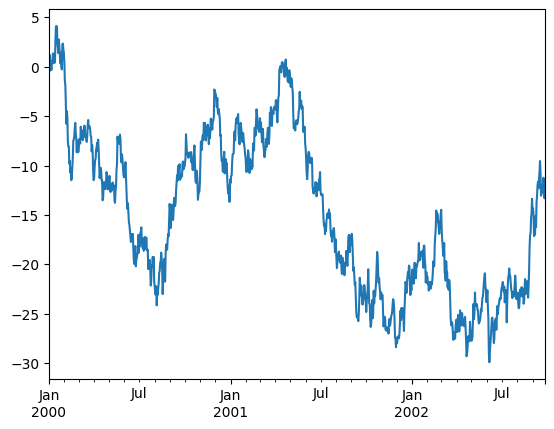

In [82]:
import matplotlib.pyplot as plt
plt.close("all")

ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot()

If running under Jupyter Notebook, the plot will appear on [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html#pandas.Series.plot). Otherwise use [`matplotlib.pyplot.show`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.show.html) to show it or [`matplotlib.pyplot.savefig`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html) to write it to a file.

On a DataFrame, the [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) method is a convenience to plot all of the columns with labels:

<Figure size 640x480 with 0 Axes>

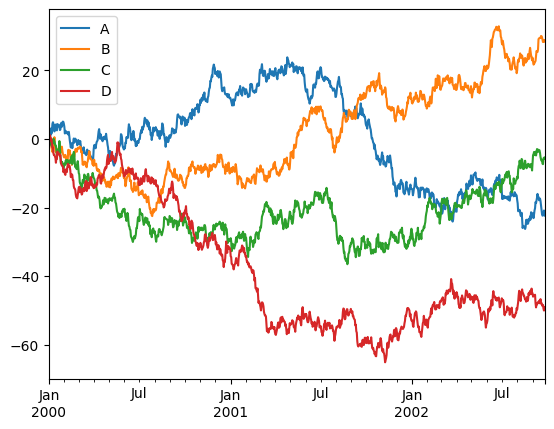

In [83]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

df = df.cumsum()
plt.figure();
df.plot();
plt.legend(loc='best');

## Importing and exporting data

### CSV

[Writing to a csv file](https://pandas.pydata.org/docs/user_guide/io.html#io-store-in-csv): using [`DataFrame.to_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html#pandas.DataFrame.to_csv)

In [84]:
df.to_csv("foo.csv")

[Reading from a csv file](https://pandas.pydata.org/docs/user_guide/io.html#io-read-csv-table): using [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv)

In [85]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.023312,1.343125,-0.772388,-0.040142
1,2000-01-02,-0.320402,0.370150,-0.602249,-0.724396
2,2000-01-03,0.314685,-0.145532,-0.955604,1.121386
3,2000-01-04,1.003680,0.060532,-0.939158,-0.034670
4,2000-01-05,3.096978,-1.128708,-1.573520,0.226903
...,...,...,...,...,...
995,2002-09-22,-22.160554,28.297509,-7.326756,-48.395597
996,2002-09-23,-22.062065,28.678308,-5.637076,-49.460332
997,2002-09-24,-20.847301,28.776827,-5.591259,-50.037152
998,2002-09-25,-22.370105,28.373820,-5.333505,-48.963783


### HDF5

Reading and writing to [HDFStores](https://pandas.pydata.org/docs/user_guide/io.html#io-hdf5).

Writing to a HDF5 Store using [`DataFrame.to_hdf()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_hdf.html#pandas.DataFrame.to_hdf):

In [86]:
df.to_hdf("foo.h5", "df")

/tmp/ipykernel_38857/992960660.py:1: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  df.to_hdf("foo.h5", "df")


Reading from a HDF5 Store using [`read_hdf()`](https://pandas.pydata.org/docs/reference/api/pandas.read_hdf.html#pandas.read_hdf):

In [87]:
pd.read_hdf("foo.h5", "df")

,A,B,C,D
2000-01-01,0.023312,1.343125,-0.772388,-0.040142
2000-01-02,-0.320402,0.370150,-0.602249,-0.724396
2000-01-03,0.314685,-0.145532,-0.955604,1.121386
2000-01-04,1.003680,0.060532,-0.939158,-0.034670
2000-01-05,3.096978,-1.128708,-1.573520,0.226903
...,...,...,...,...
2002-09-22,-22.160554,28.297509,-7.326756,-48.395597
2002-09-23,-22.062065,28.678308,-5.637076,-49.460332
2002-09-24,-20.847301,28.776827,-5.591259,-50.037152
2002-09-25,-22.370105,28.373820,-5.333505,-48.963783


### Excel

Reading and writing to [Excel](https://pandas.pydata.org/docs/user_guide/io.html#io-excel).

Writing to an excel file using [`DataFrame.to_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html#pandas.DataFrame.to_excel):

In [88]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

Reading from an excel file using [`read_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html#pandas.read_excel):

In [89]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.023312,1.343125,-0.772388,-0.040142
1,2000-01-02,-0.320402,0.370150,-0.602249,-0.724396
2,2000-01-03,0.314685,-0.145532,-0.955604,1.121386
3,2000-01-04,1.003680,0.060532,-0.939158,-0.034670
4,2000-01-05,3.096978,-1.128708,-1.573520,0.226903
...,...,...,...,...,...
995,2002-09-22,-22.160554,28.297509,-7.326756,-48.395597
996,2002-09-23,-22.062065,28.678308,-5.637076,-49.460332
997,2002-09-24,-20.847301,28.776827,-5.591259,-50.037152
998,2002-09-25,-22.370105,28.373820,-5.333505,-48.963783


## Gotchas

If you are attempting to perform a boolean operation on a [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) or [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) you might see an exception like:

In [90]:
if pd.Series([False, True, False]):
     print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

See [Comparisons](https://pandas.pydata.org/docs/user_guide/basics.html#basics-compare) and [Gotchas](https://pandas.pydata.org/docs/user_guide/gotchas.html#gotchas) for an explanation and what to do.